## Universidad Autonoma de Aguascalientes
## Departamento: Ciencias de la computacion
## Carrera: Ingenieria en Computacion Inteligente
## Curso: Machine  y Deep Learning
## Maestro: Dr. Francisco Javier Luna Rosas
## Alumno: Guillermo González Lara (237864)
 Semestre: Enero_Junio del 2026

## Practica 9: Redes neuronales (Formas de Entrenamiento)


Paso 1: Importar las librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler

Paso 2: Cargar Datos

In [2]:
df = pd.read_csv('../movies_dataset.csv')

Paso 3: Limpieza y creación de clases binarias

In [3]:
features = ["popularity", "vote_count"]
target = "vote_average"

# 3. Limpieza básica (eliminar nulos en las columnas que usaremos)
df_clean = df[features + [target]].dropna()

# 4. Crear clase binaria: 1 si Rating > 6.5 (Buena), 0 si no
df_clean["clase"] = (df_clean[target] > 6.5).astype(int)

Paso 4: Muestreo

In [4]:
# 5. MUESTREO (IMPORTANTE):
# Tomamos solo 100 datos para que LOOCV corra rápido en la práctica
df_sample = df_clean.iloc[:100].copy()

X = df_sample[features]
y = df_sample['clase']

# Escalar los datos (Recomendado para Redes Neuronales)
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print(f"Datos listos. Dimensiones: {X.shape}")
print(f"Distribución de clases: {y.value_counts().to_dict()}")

Datos listos. Dimensiones: (100, 2)
Distribución de clases: {1: 61, 0: 39}


Paso 5: Aplicar técnicas

In [5]:
# Listas para guardar los errores promedio de cada iteración
error_tc = []   # Tabla Completa
error_tt = []   # Train-Test
error_loo = []  # Leave-One-Out
error_cv = []   # K-Fold

n = X.shape[0] # Cantidad de datos (100)

# Repetimos el experimento 9 veces (iteraciones 0 a 8)
for i in range(9):
    
    # --- 1) Enfoque Tabla Completa (Training = Testing) ---
    red = MLPClassifier(max_iter=1000)
    red.fit(X, y)
    error_tc.append(1 - red.score(X, y))
    
    # --- 2) Enfoque Train/Test Split (70% Train, 30% Test) ---
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    red = MLPClassifier(max_iter=1000)
    red.fit(X_train, y_train)
    error_tt.append(1 - red.score(X_test, y_test))
    
    # --- 3) Enfoque LOOCV (Leave-One-Out) ---
    errores_acumulados = 0
    for j in range(n):
        X_train_loo = X.drop(j, axis=0)
        y_train_loo = y.drop(j, axis=0)
        X_test_loo = X.iloc[[j]]
        y_test_loo = y.iloc[j]
        
        red = MLPClassifier(max_iter=500)
        red.fit(X_train_loo, y_train_loo)
        prediccion = red.predict(X_test_loo)
        
        if prediccion[0] != y_test_loo:
            errores_acumulados += 1
            
    error_loo.append(errores_acumulados / n)

    # --- 4) Enfoque K-Fold (K Grupos) ---
    kfold = KFold(n_splits=10, shuffle=True)
    errores_kfold = []
    
    for train_idx, test_idx in kfold.split(X, y):
        X_train_kf, X_test_kf = X.iloc[train_idx], X.iloc[test_idx]
        y_train_kf, y_test_kf = y.iloc[train_idx], y.iloc[test_idx]
        
        red = MLPClassifier(max_iter=1000)
        red.fit(X_train_kf, y_train_kf)
        errores_kfold.append(1 - red.score(X_test_kf, y_test_kf))
    
    error_cv.append(np.mean(errores_kfold))
    
    print(f"Iteración {i} completada...")

c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the

Iteración 0 completada...


c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the

Iteración 1 completada...


c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the

Iteración 2 completada...


c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the 

Iteración 3 completada...


c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the 

Iteración 4 completada...


c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the 

Iteración 5 completada...


c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the 

Iteración 6 completada...


c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the

Iteración 7 completada...


c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the

Iteración 8 completada...


c:\Users\Laremo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Paso 6: Mostrar los resultados

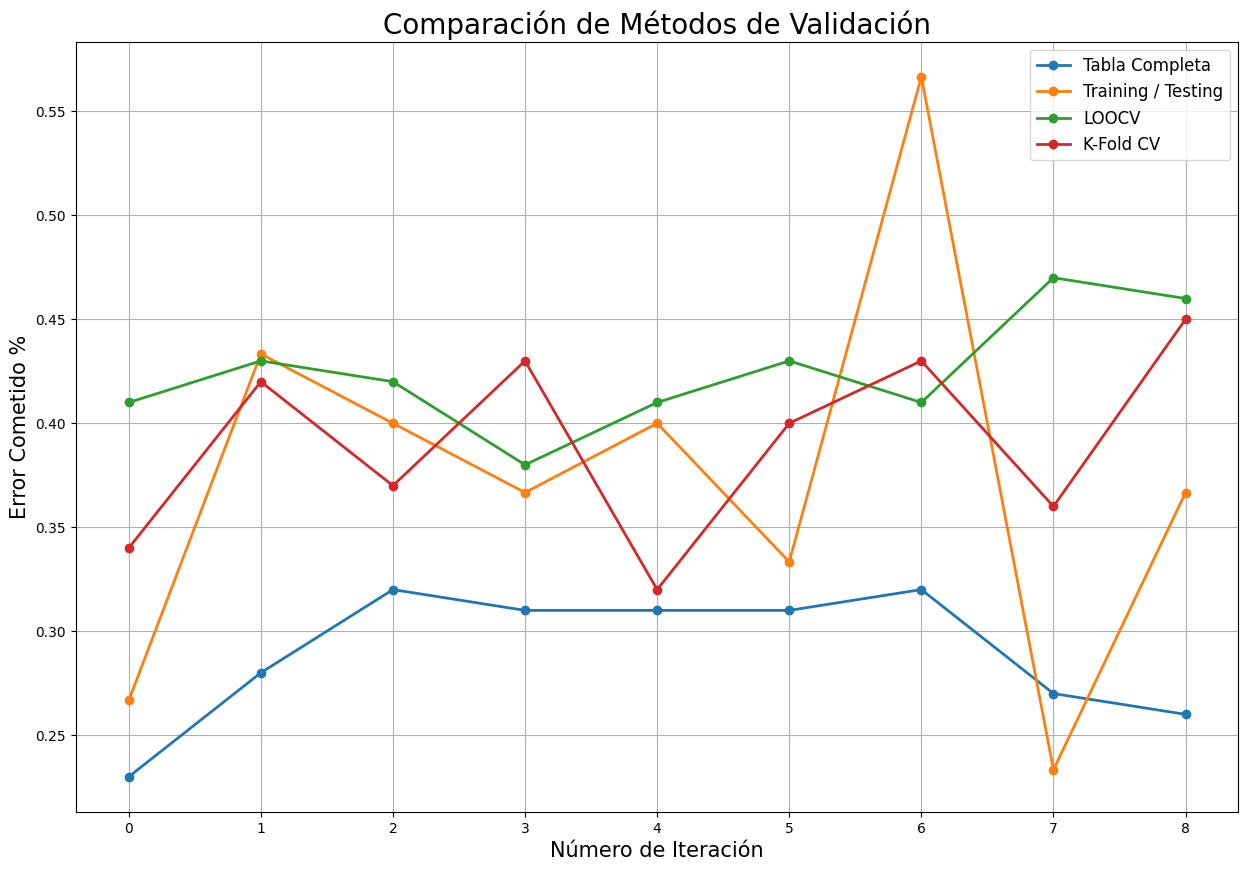

In [6]:
# Gráfica
plt.figure(figsize=(15, 10))
plt.plot(error_tc, 'o-', lw=2, label='Tabla Completa')
plt.plot(error_tt, 'o-', lw=2, label='Training / Testing')
plt.plot(error_loo, 'o-', lw=2, label='LOOCV')
plt.plot(error_cv, 'o-', lw=2, label='K-Fold CV')
plt.xlabel("Número de Iteración", fontsize=15)
plt.ylabel("Error Cometido %", fontsize=15)
plt.title("Comparación de Métodos de Validación", fontsize=20)
plt.grid(True)
plt.legend(loc='upper right', fontsize=12)
plt.show()